In [6]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")


In [7]:
train = pd.merge(train, stores, on="Store", how="left")


In [8]:
train = pd.merge(train, features, on=["Store", "Date"], how="left")


In [9]:
train.fillna(0, inplace=True)


In [10]:
X = train.drop("Weekly_Sales", axis=1)
y = train["Weekly_Sales"]


In [11]:
X["Date"] = pd.to_datetime(X["Date"])
X["Year"] = X["Date"].dt.year
X["Month"] = X["Date"].dt.month
X["Week"] = X["Date"].dt.isocalendar().week.astype(int)

X.drop("Date", axis=1, inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

model = lgb.LGBMRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=7
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2530
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 18
[LightGBM] [Info] Start training from score 15979.221909
MAE: 3519.705889663036


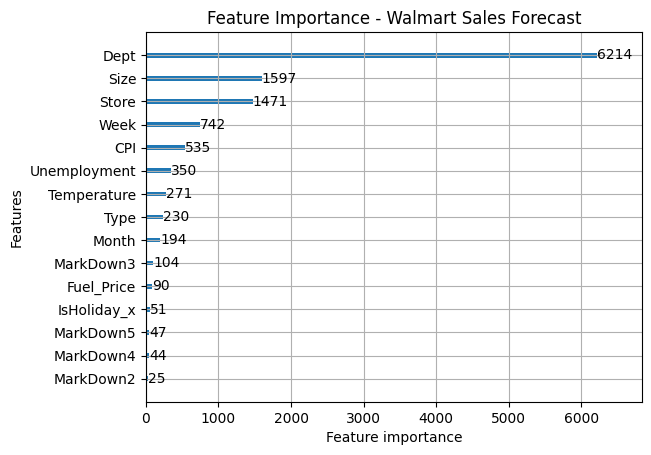

In [15]:
import matplotlib.pyplot as plt

lgb.plot_importance(model, max_num_features=15)
plt.title("Feature Importance - Walmart Sales Forecast")
plt.show()
